In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Используем данные mtcars. Сохраните в переменную логистическую регрессионную модель, где в качестве зависимой переменной выступает тип коробки передач (am), в качестве предикторов переменные disp, vs, mpg.

Значения коэффициентов регрессии сохраните в переменную log_coef.

In [8]:
%%R 
fit <- glm(am ~ disp+vs+mpg, mtcars, family = "binomial")
summary(fit)


Call:
glm(formula = am ~ disp + vs + mpg, family = "binomial", data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1115  -0.5412  -0.1474   0.2127   2.2639  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.89136    7.26516   0.260   0.7946  
disp        -0.02525    0.01562  -1.617   0.1059  
vs          -5.45385    2.79897  -1.949   0.0514 .
mpg          0.28419    0.24442   1.163   0.2450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.23  on 31  degrees of freedom
Residual deviance: 19.90  on 28  degrees of freedom
AIC: 27.9

Number of Fisher Scoring iterations: 6



In [9]:
%%R
fit$coefficients

(Intercept)        disp          vs         mpg 
 1.89136001 -0.02525354 -5.45384569  0.28418829 


Дополните предложенный в задании код, чтобы построить следующий график по данным ToothGrowth.
Изобразите различия длины зубов морских свинок в различных условиях дозировки и типа потребляемого продукта.

По оси x - переменная supp.
По оси y - переменная len.
Цвет ящиков с усами (boxplot) - переменная dose.

Если все правильно, то должен получиться следующий график:

![](https://ucarecdn.com/18728214-1a5e-47c0-a239-8952442b99f9/)

In [0]:
%%R 
library("ggplot2")

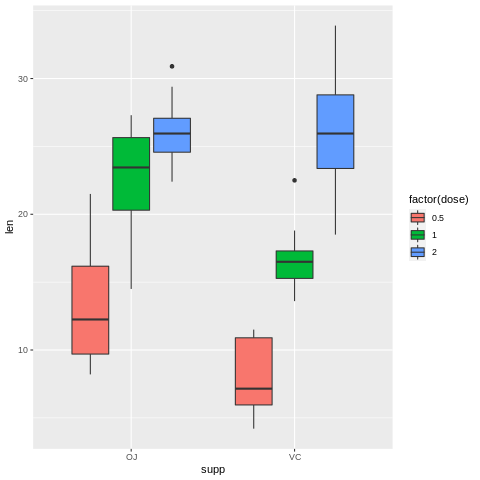

In [14]:
%%R 
ggplot(data = ToothGrowth, aes(x=supp, y=len, fill=factor(dose)))+
    geom_boxplot()

Используем модельные данные о соотношении среднего и высшего образования в американских школах. Данные доступны по ссылке: https://stepic.org/media/attachments/lesson/11478/data.csv Про часть испытуемых известно, поступили они в университет или нет (переменная admit, 1 = поступили, 0 = не поступили), про остальных таких данных нет (NA). Описание данных (обратите на него внимание при проведении подсчётов):
```
'data.frame':  400 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 2 NA NA 1 2 NA NA 2 1 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...
 ```
По имеющимся данным в переменной admit постройте логистическую регрессионную модель, предсказывающую результат поступления по престижности учебного заведения среднего образования (переменная rank, 1 — наиболее престижное, 4 — наименее престижное) и результатов GPA (переменная gpa) с учётом их взаимодействия. Примените эту модель к той части данных, где результат поступления неизвестен.

Ответом в задаче будет предсказанное моделью число поступивших из тех, для кого результат поступления был неизвестен. Считаем человека поступившим, когда вероятность его поступления не меньше 0.4.

In [15]:
%%R 
x <- read.csv("https://stepic.org/media/attachments/lesson/11478/data.csv ")
str(x)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 NA NA 0 1 NA NA 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [16]:
%%R 
x$admit <- factor(x$admit)
x$rank <- factor(x$rank)
x$notna <- ifelse(is.na(x$admit),0,1)
usa_fit <- glm(admit ~ gpa*rank,data = x[x$notna==1,],family = 'binomial')
vec <- predict(object = usa_fit, newdata=x[is.na(x$admit),], type='response')
length (vec[vec>=0.4])

[1] 56
